# Tool For Predict Diabetes #

#### This tool takes a dataset of properties  ####

## Imports ##

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
import statsmodels.api as sm
import matplotlib as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Gather And Clean Data ## 

[Source: DataSet](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)

In [4]:
dataset = load_diabetes()
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [5]:
data = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
data['Prog'] = dataset.target
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [6]:
data.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Prog
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


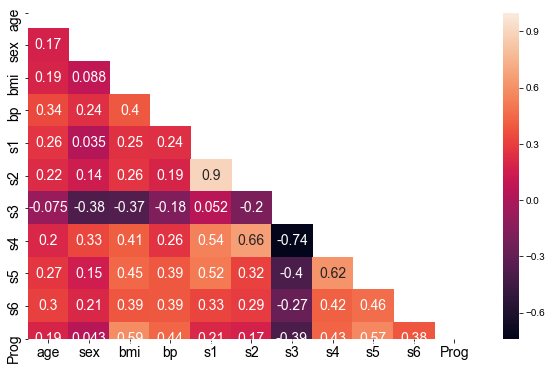

In [7]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

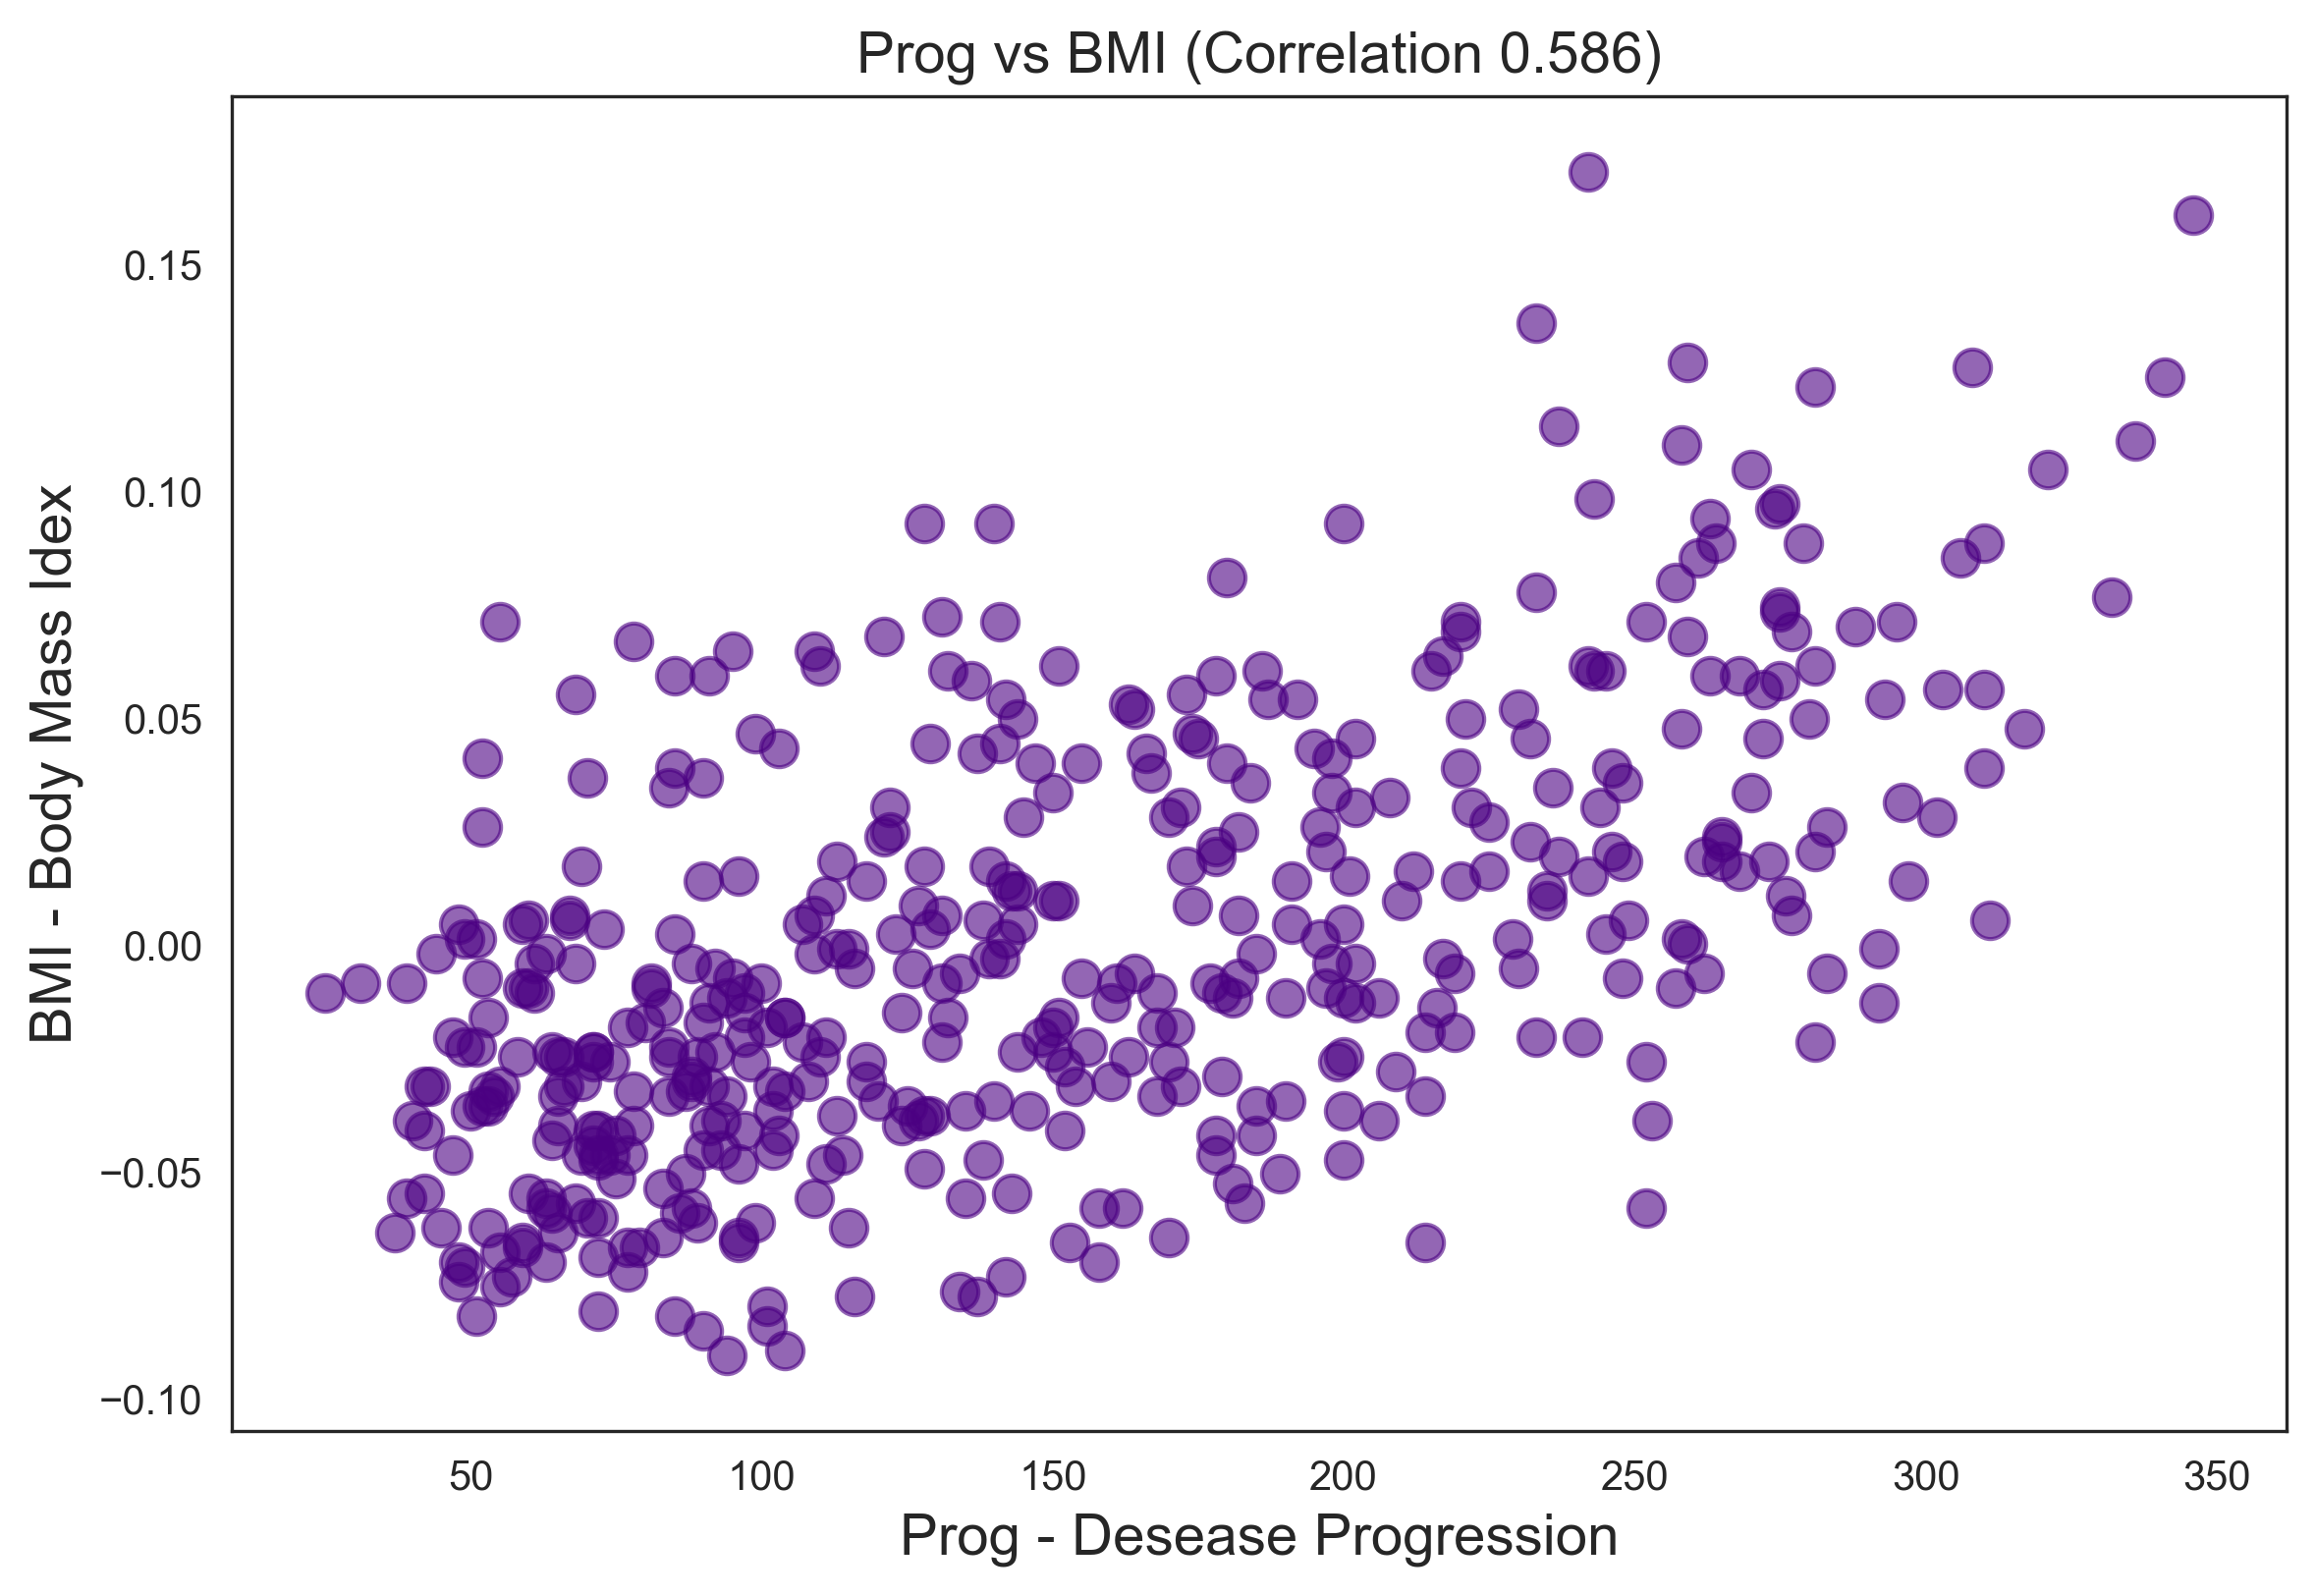

In [8]:
prog_bmi_corr = round(data['Prog'].corr(data['bmi']), 3)

plt.figure(figsize=(9, 6), dpi=300)
plt.scatter(x=data['Prog'], y=data['bmi'], alpha=0.6, s=80, color='indigo')

plt.title(f'Prog vs BMI (Correlation {prog_bmi_corr})', fontsize=14)
plt.xlabel('Prog - Desease Progression', fontsize=14)
plt.ylabel('BMI - Body Mass Idex', fontsize=14)
plt.show()

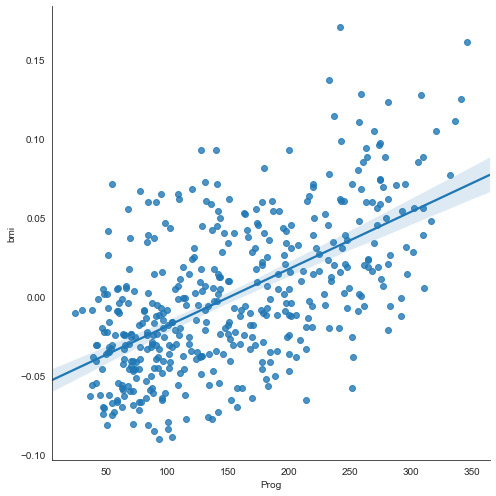

In [9]:
sns.lmplot(x='Prog', y='bmi', data=data, height=7)
plt.show()

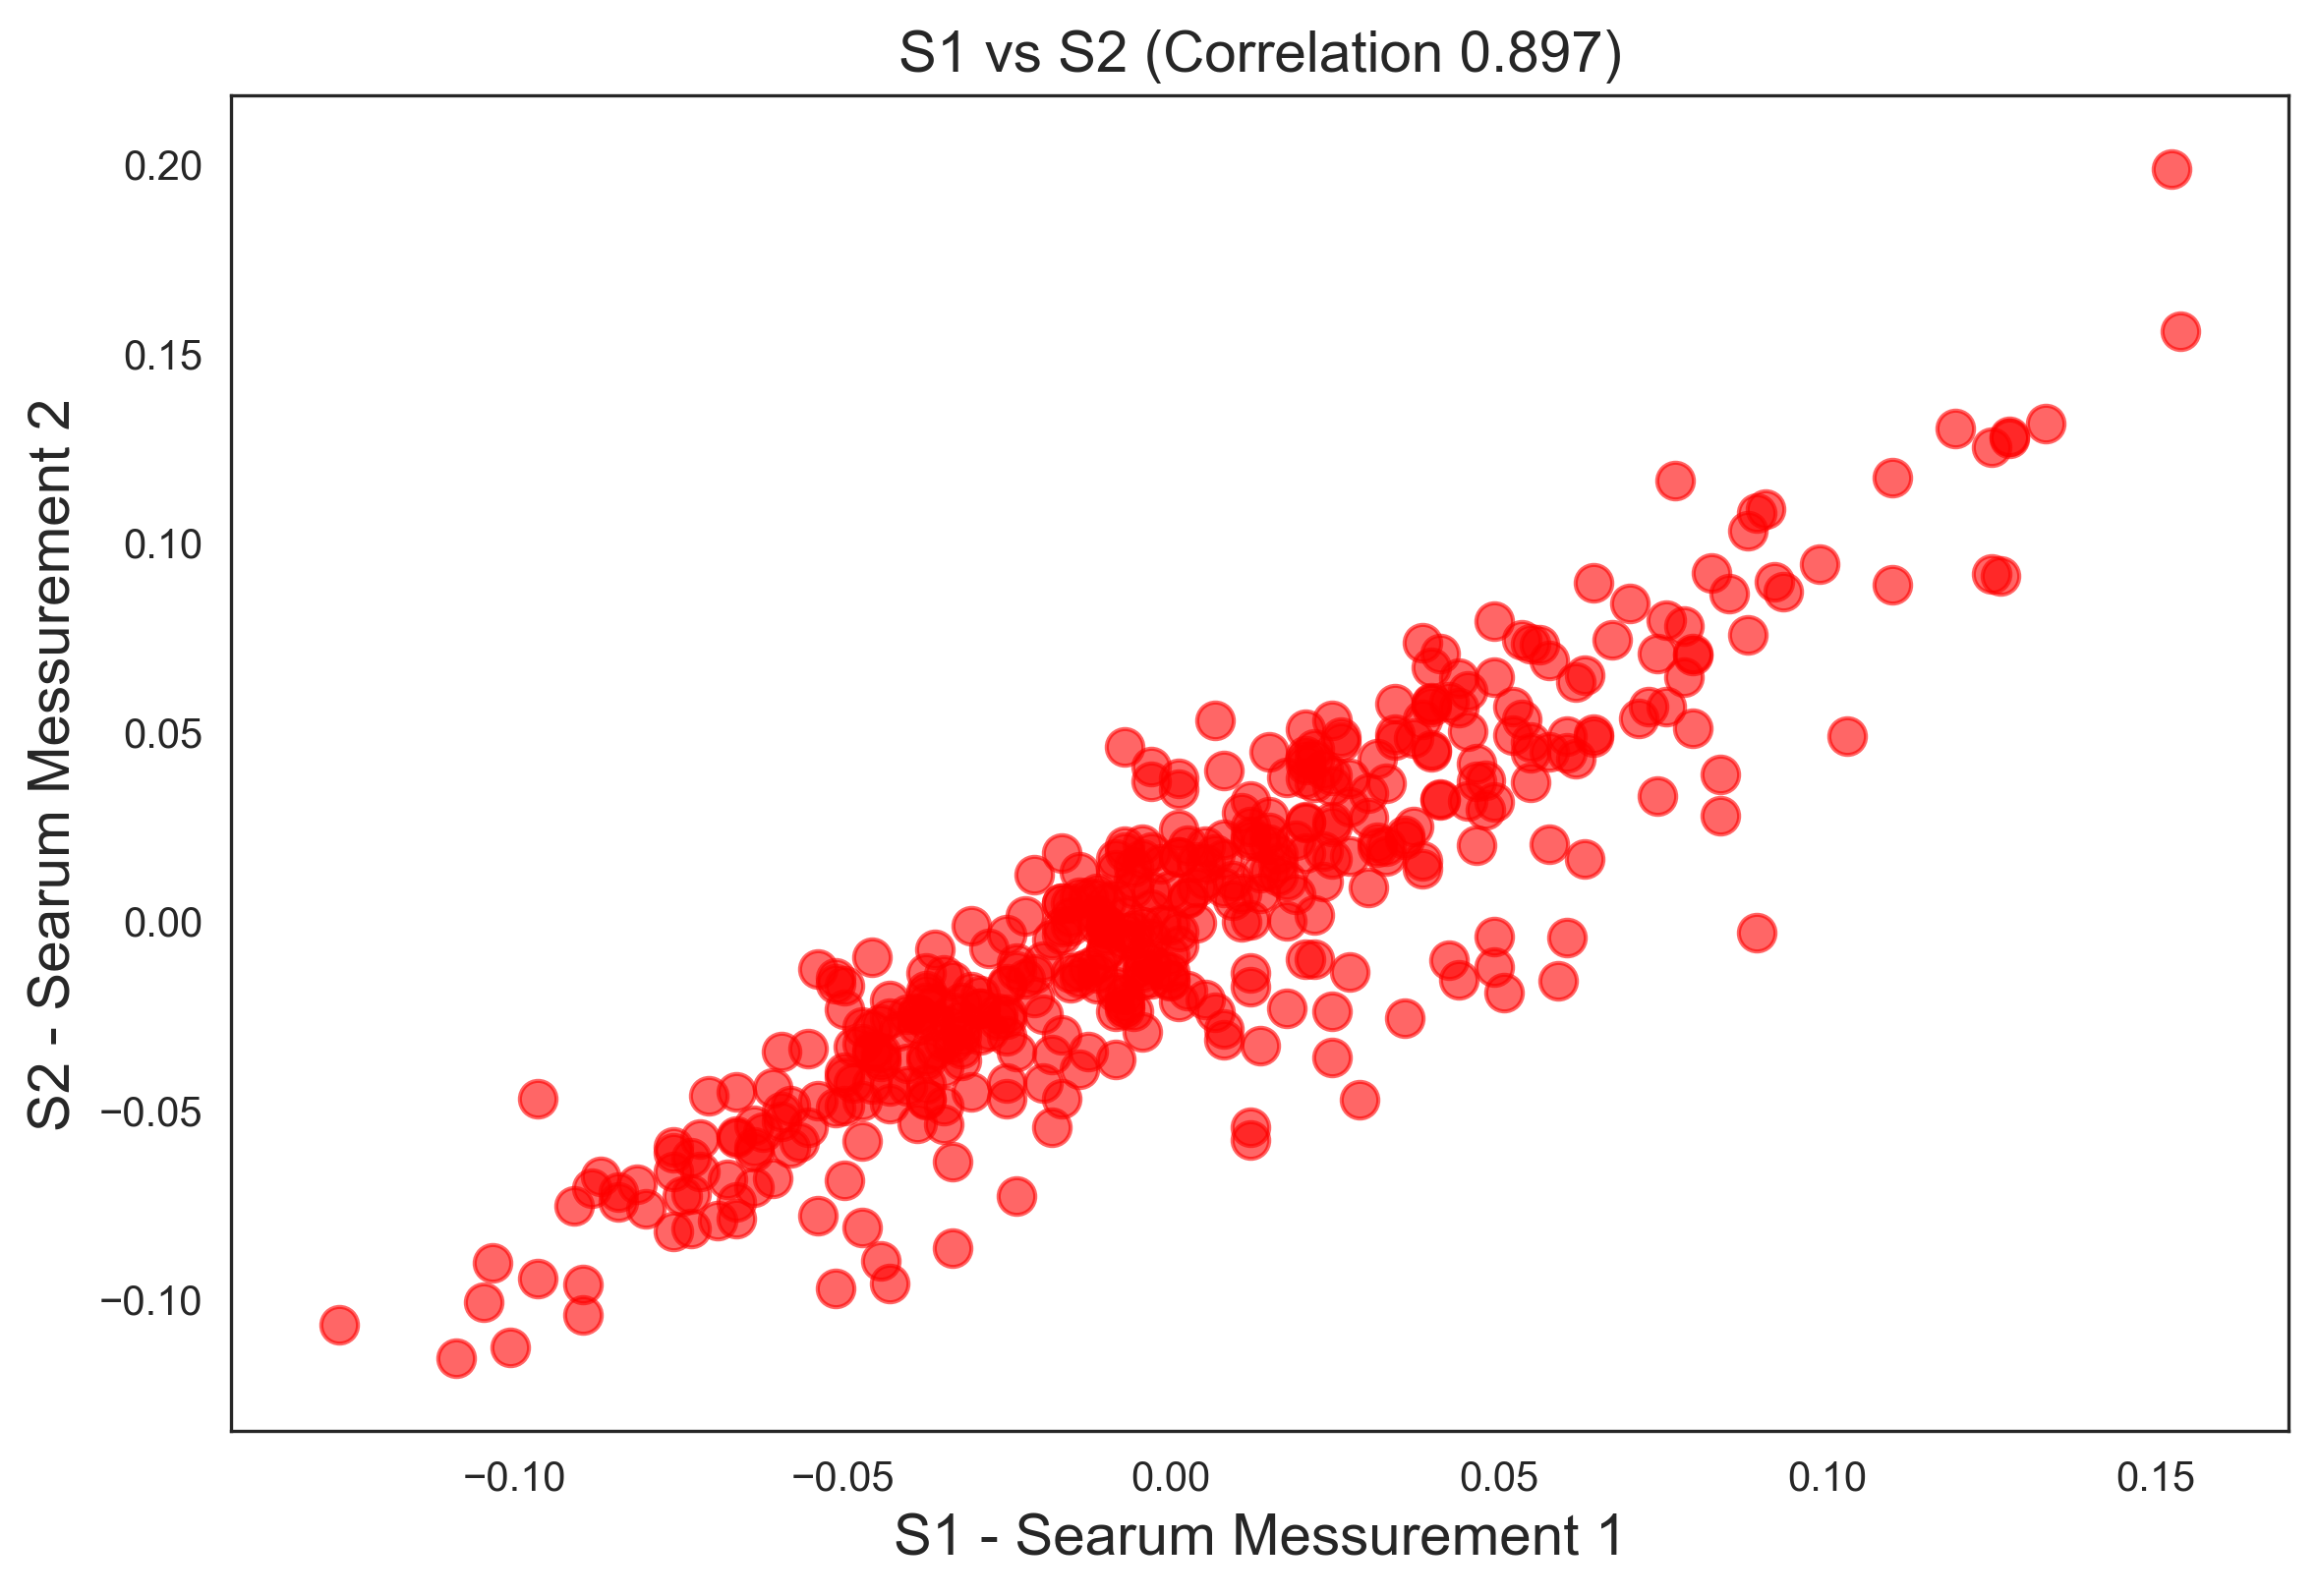

In [10]:
s1_s2_corr = round(data['s1'].corr(data['s2']), 3)

plt.figure(figsize=(9, 6), dpi=300)
plt.scatter(x=data['s1'], y=data['s2'], alpha=0.6, s=80, color='red')

plt.title(f'S1 vs S2 (Correlation {s1_s2_corr})', fontsize=14)
plt.xlabel('S1 - Searum Messurement 1', fontsize=14)
plt.ylabel('S2 - Searum Messurement 2', fontsize=14)
plt.show()

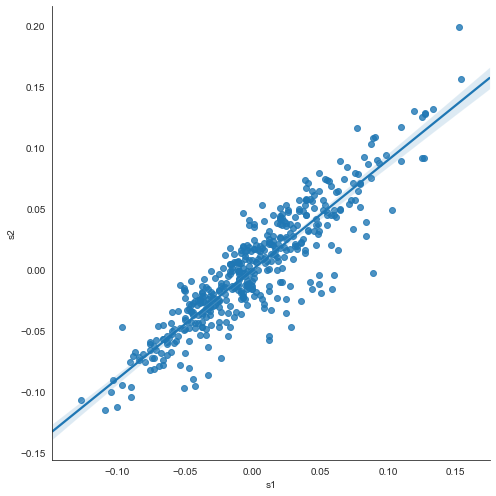

In [11]:
sns.lmplot(x='s1', y='s2', data=data, height=7)
plt.show()

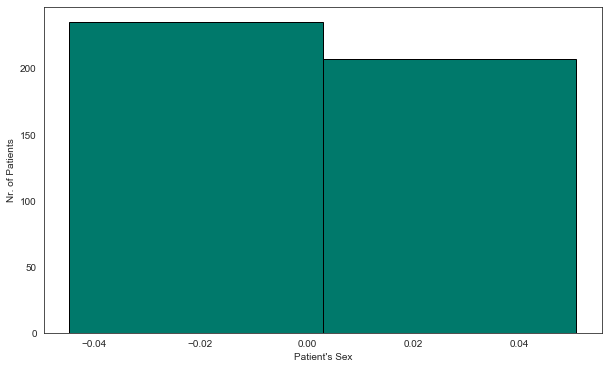

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(data['sex'], ec='black',bins=2, color='#00796b')
plt.xlabel("Patient's Sex")
plt.ylabel('Nr. of Patients')
plt.show()

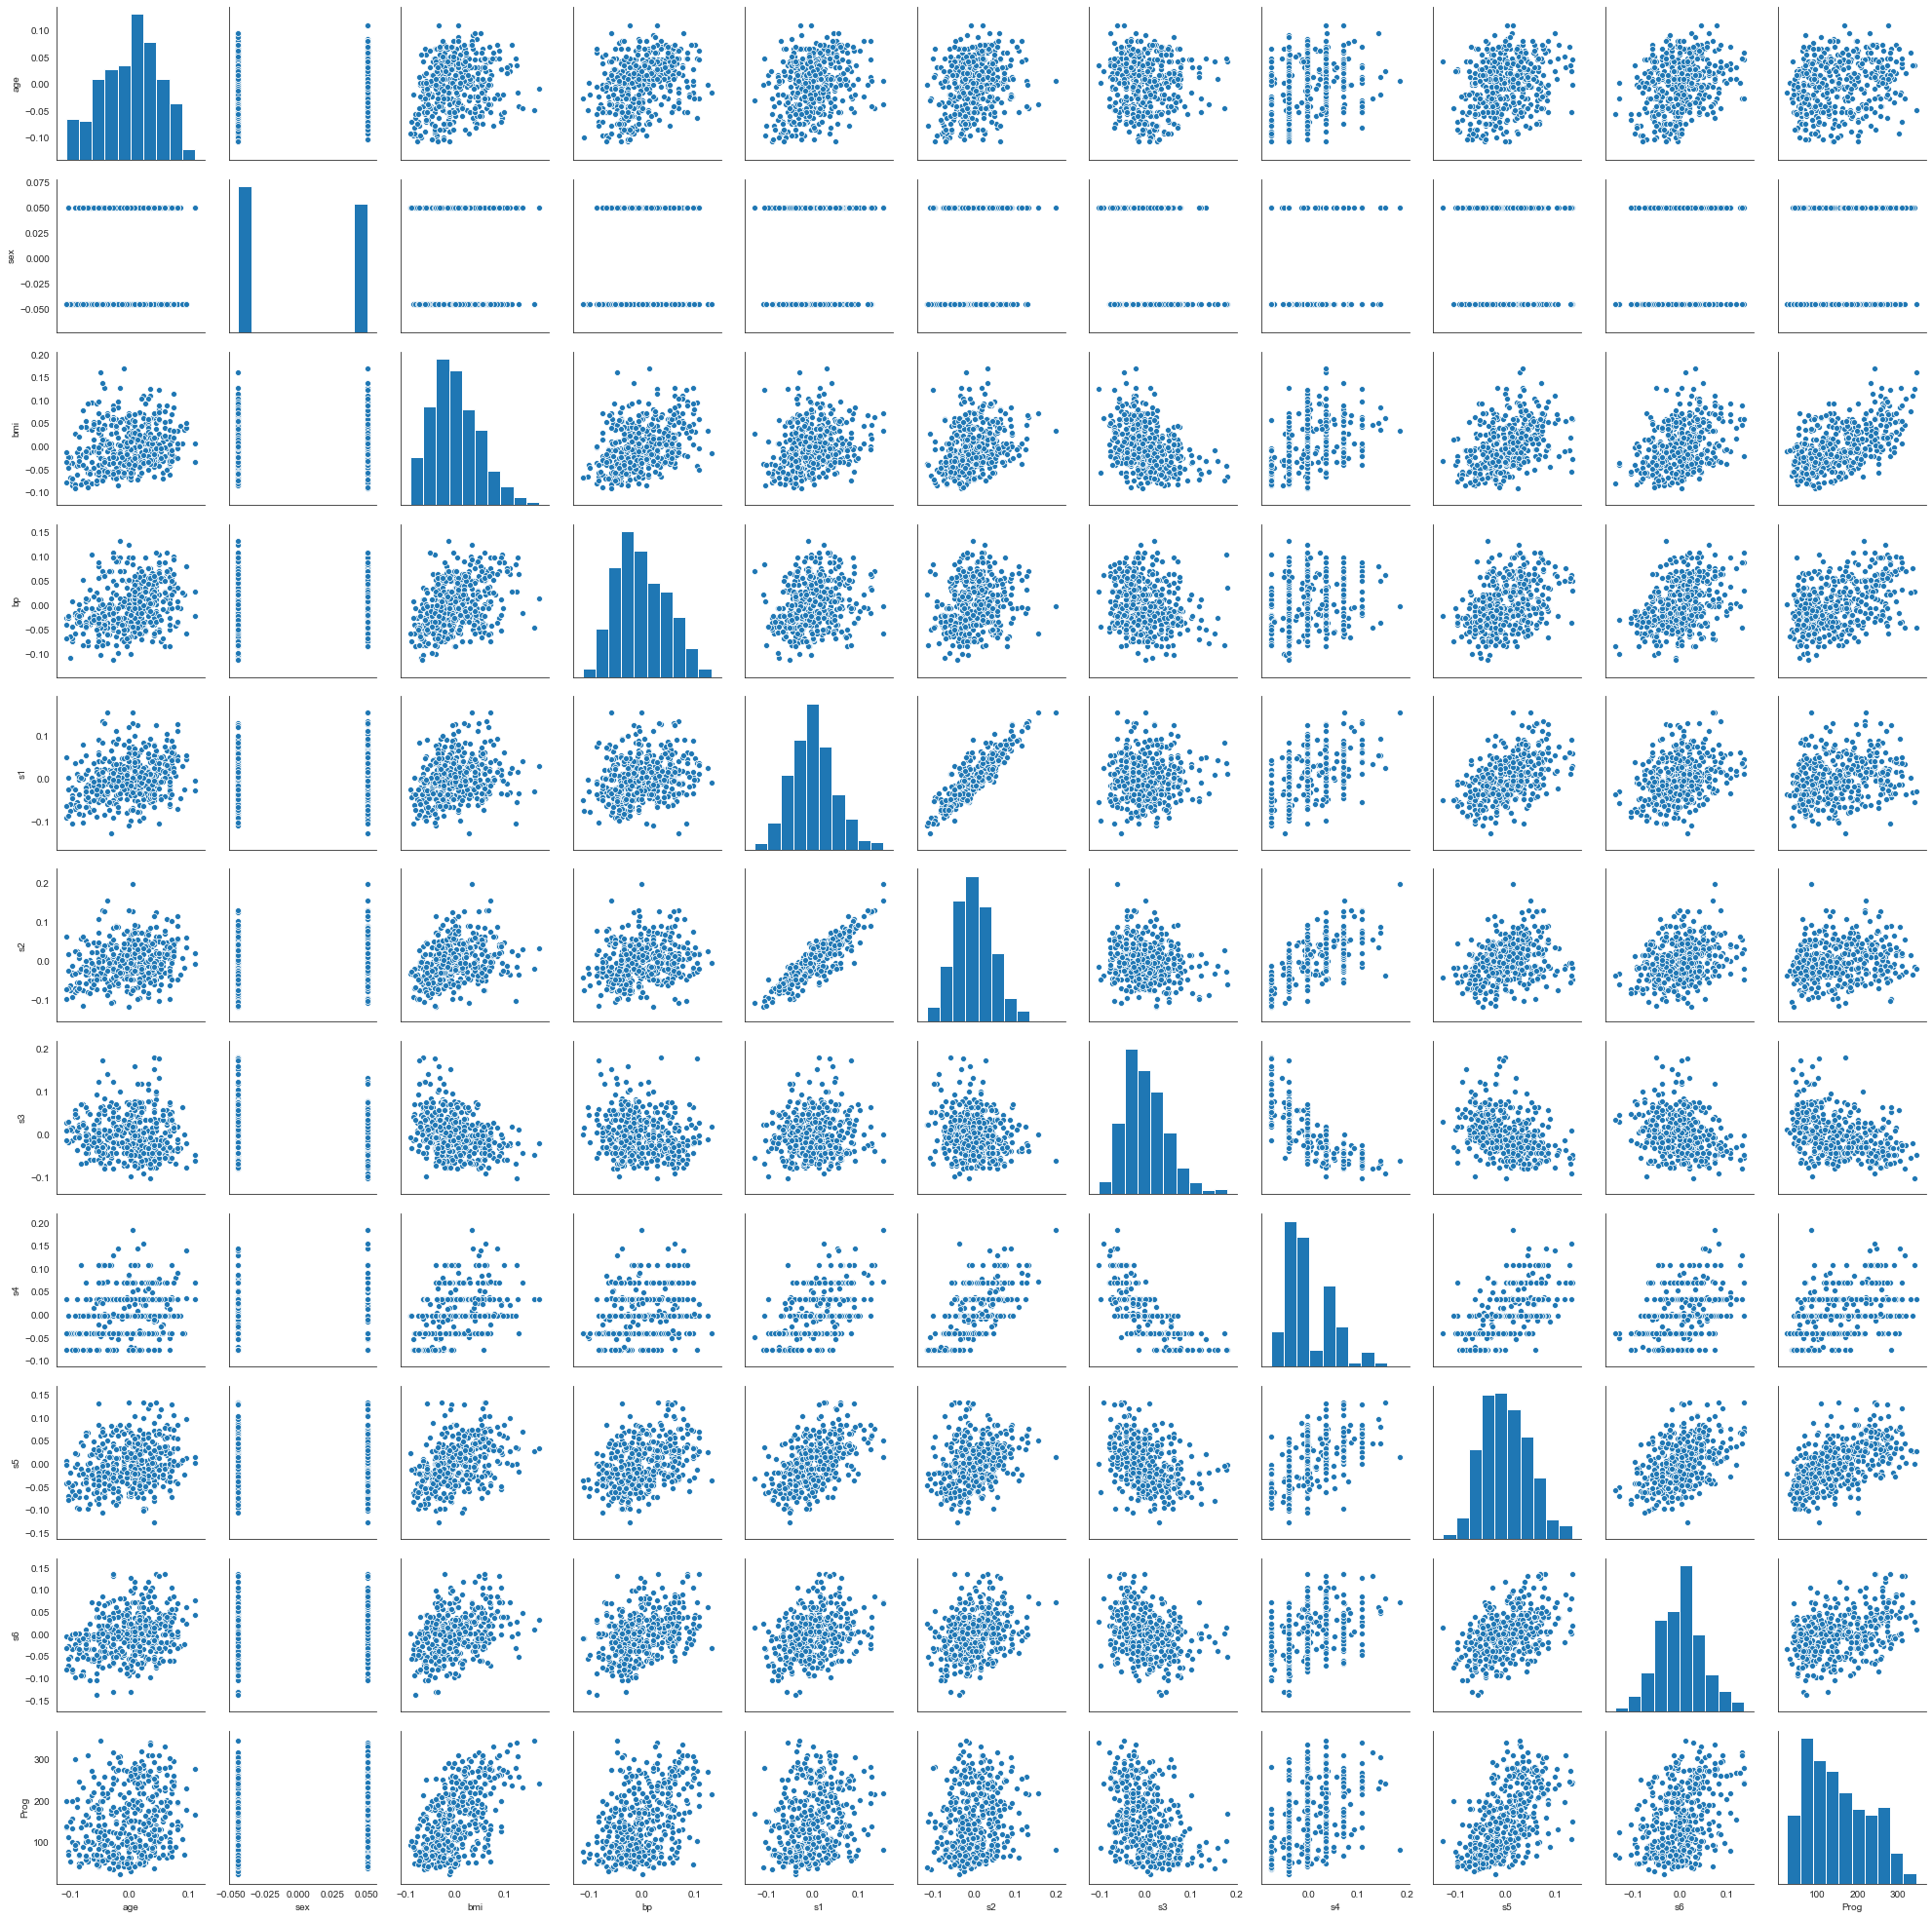

In [13]:
sns.pairplot(data)
plt.show()

In [14]:
prog = data['Prog']
features = data.drop('Prog', axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, prog, 
                                                    test_size=0.2, random_state=10)

# % of training set
len(X_train)/len(features)

0.7986425339366516

In [16]:
# Original model with log prices and all features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

# Challenge: find and check official docs for results object and print out BIC & r-squared
print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is 3874.56993075314
r-squared is 0.5122968220801789


c:\users\julian\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
# Reduced model
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['age'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is 3868.706812553292
r-squared is 0.5122921939110633


In [18]:
# Reduced model
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['age','s4'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is 3864.3611131697903
r-squared is 0.5101865545375024


In [19]:
# Reduced model
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['age','s4','s6'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_columns = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)
print(coef_minus_columns)

BIC is 3858.938370645649
r-squared is 0.5095704656122522
             coef  p-value
const  152.230436    0.000
sex   -216.456856    0.001
bmi    523.901459    0.000
bp     323.808547    0.000
s1    -523.490515    0.216
s2     346.275912    0.335
s3    -114.023634    0.503
s5     692.791783    0.000


In [20]:
property_stats = features.mean().values.reshape(1, 10)
print(property_stats)

[[-3.63428493e-16  1.30834257e-16 -8.04534920e-16  1.28165452e-16
  -8.83531559e-17  1.32702421e-16 -4.57464634e-16  3.77730150e-16
  -3.83085422e-16 -3.41288202e-16]]


In [21]:
regr = LinearRegression().fit(features, prog)
fitted_vals = regr.predict(features)

# Challenge: calculate the MSE and RMSE using sklearn
MSE = mean_squared_error(prog, fitted_vals)
RMSE = np.sqrt(MSE)

In [26]:
def get_log_estimate():
    
    # Make prediction
    log_estimate = regr.predict(property_stats)
    high_confidence = True
    # Calc Range 
    if high_confidence:
        upper_bound = log_estimate + 2*RMSE
        lower_bound = log_estimate - 2*RMSE
        interval = 95
    else:
        upper_bound = log_estimate + RMSE
        lower_bound = log_estimate - RMSE
        interval = 68
    
    return log_estimate, upper_bound, lower_bound, interval

In [27]:
log_estimate, upper_bound, lower_bound, interval = get_log_estimate()

In [ ]:
print